# 1. Acquiring data and creating an evironment

In [2]:
import pandas as pd
import numpy as np

In [16]:
train = pd.read_csv('C:/Users/manis/OneDrive/Desktop/Kaggle Housing/all/train.csv')
test = pd.read_csv('C:/Users/manis/OneDrive/Desktop/Kaggle Housing/all/test.csv')


In [17]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [27]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Exploring data and engineering features

In [25]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [26]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


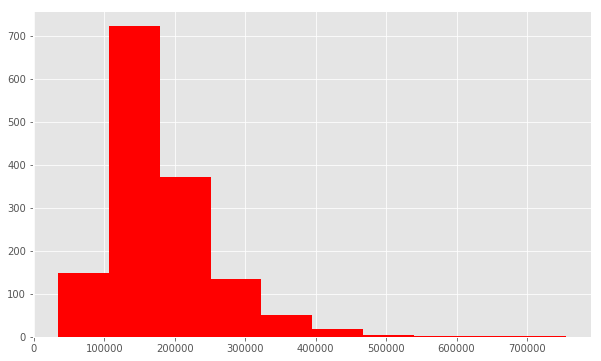

In [31]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='red')
plt.show()

Skew is: 0.12133506220520406


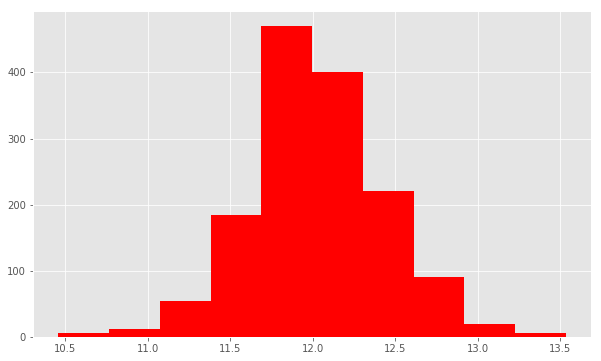

In [33]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='red')
plt.show()

In [35]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

# 3. Working with numeric features

In [37]:
corr = numeric_features.corr()
print(corr)


                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [38]:
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [41]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [44]:
quality_pivot = train.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)

In [45]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


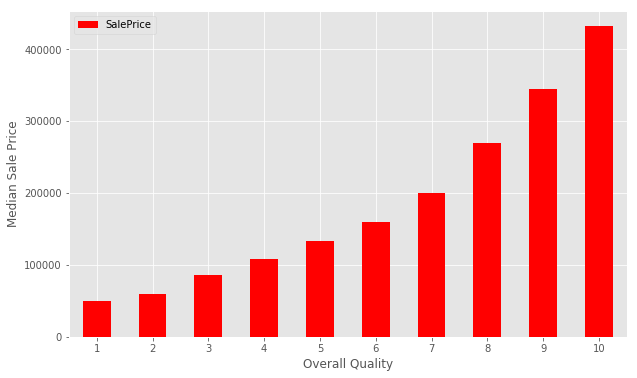

In [59]:
quality_pivot.plot(kind='bar', color='red')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

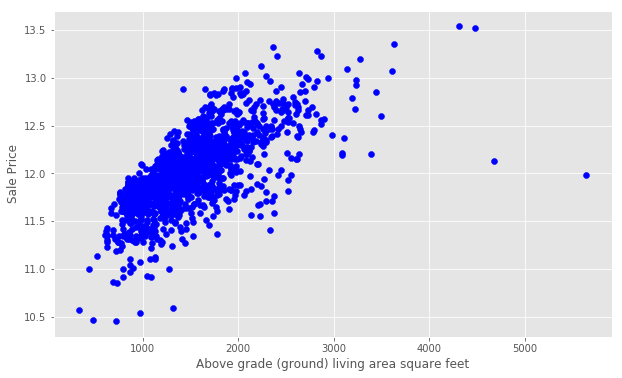

In [61]:
plt.scatter(x=train['GrLivArea'], y=target, color = 'blue')
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

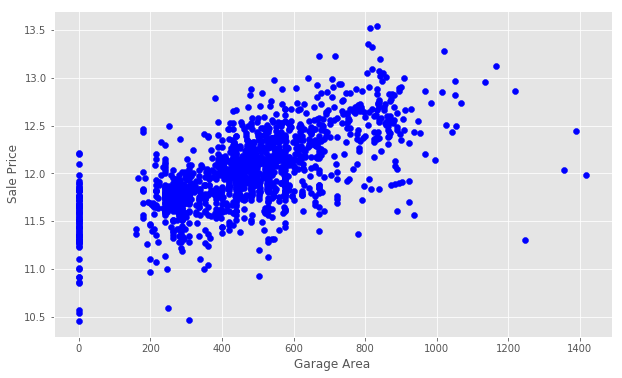

In [63]:
plt.scatter(x=train['GarageArea'], y=target, color = 'blue')
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [72]:
train = train[train['GarageArea'] < 1200]


In [81]:
train.GarageArea.sort_values(ascending = False).head()

178     1166
664     1134
1417    1069
270     1053
1228    1052
Name: GarageArea, dtype: int64

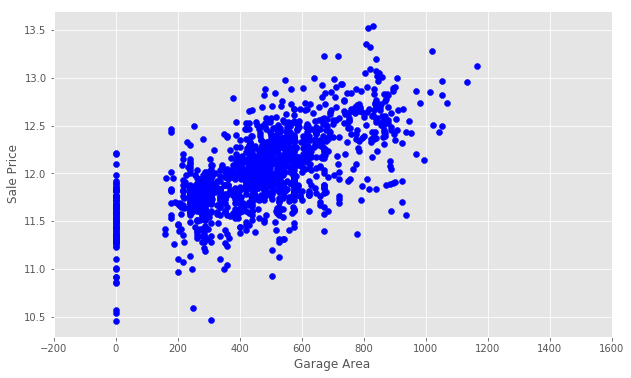

In [130]:
plt.scatter(x=train['GarageArea'], y= np.log(train.SalePrice), color = 'blue')
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

# 4. Handling null values

In [97]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageQual,81
GarageCond,81
GarageFinish,81


In [88]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


# 5. Wrangling the non-numeric features

In [89]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [99]:
train.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

# 6. Transforming engineering features

In [95]:
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [96]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

               SalePrice
SaleCondition           
Abnorml           130000
AdjLand           104000
Alloca            148145
Family            140500
Normal            160000
Partial           242300


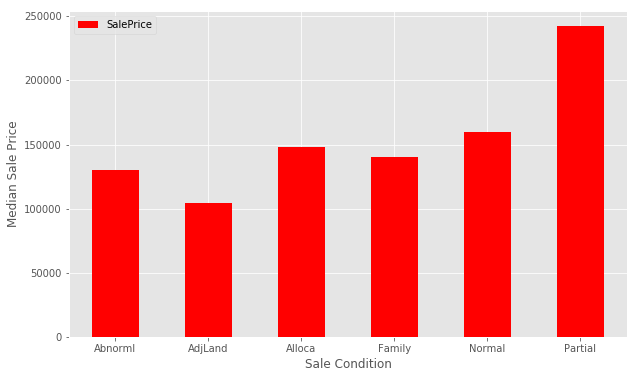

In [105]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
print(condition_pivot)
condition_pivot.plot(kind='bar', color='red')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [106]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

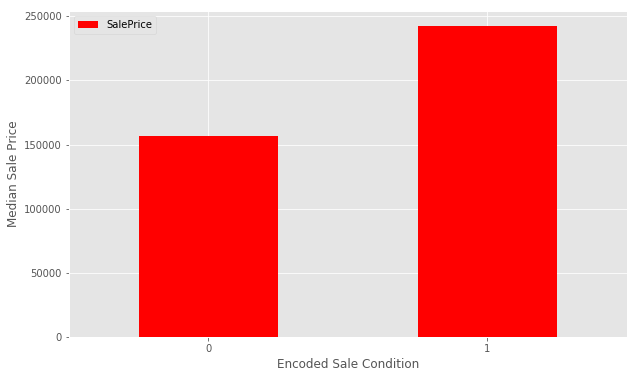

In [107]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='red')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [108]:
print(condition_pivot)

               SalePrice
enc_condition           
0                 157000
1                 242300


In [109]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [117]:
sum(data.isnull().sum() != 0)

0

# 7. Building a linear model

In [131]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

# 8. Begin linear modelling

In [133]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [134]:
model = lr.fit(X_train, y_train)

In [135]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 9. Evaluate the performance and visualize the results

In [136]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8882477709262553


In [139]:
predictions = model.predict(X_test)

In [140]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.01784179451956757


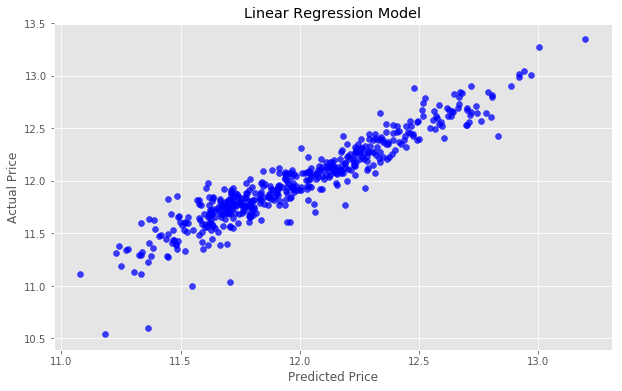

In [141]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

# 10. Ridge regularization

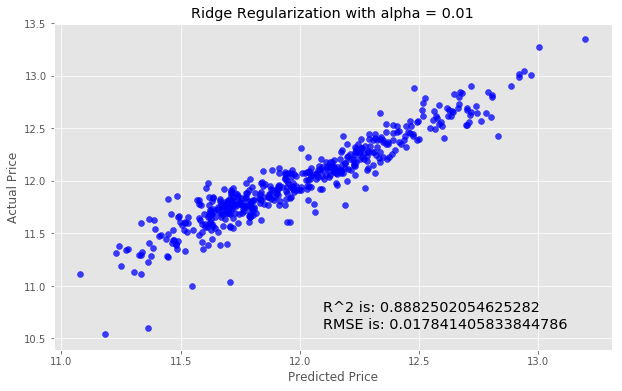

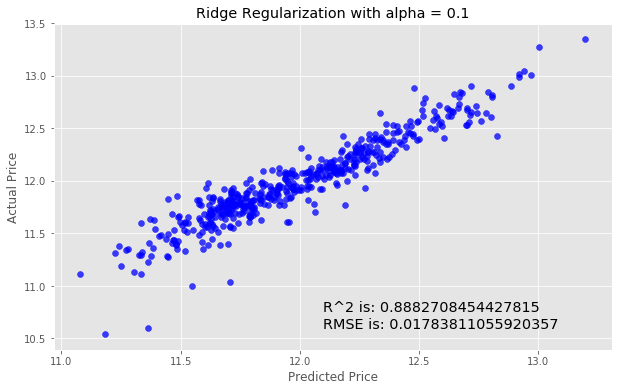

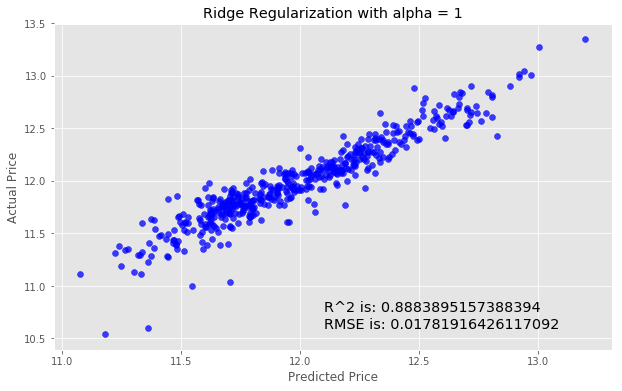

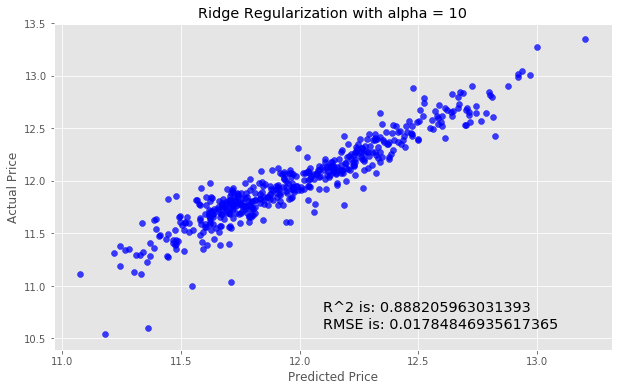

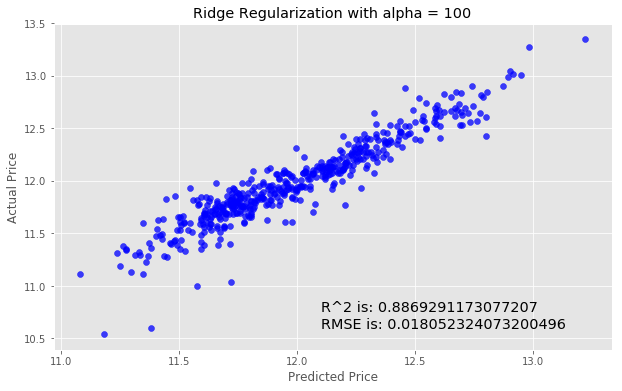

In [142]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

# 11. Submission

In [143]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [144]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [145]:
predictions = model.predict(feats)

In [146]:
final_predictions = np.exp(predictions)

In [147]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655] 

Final predictions are: 
 [128959.49172586 122920.7402436  175704.82598102 200050.83263756
 182075.46986405]


In [148]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [149]:
submission.to_csv('submission1.csv', index=False)